In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as anim
from matplotlib.animation import FFMpegWriter
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\ffmpeg.exe'

In [1]:
def wave(amp,k,x,t,f):
    return amp*np.cos(k*x-2*np.pi*f*t)

def wam(amp1,k1,amp2,k2,x,t,f1,f2):
    msignal = wave(amp1,k1,x,t,f1)
    mcarrier = wave(1,k2,x,t,f2)
    amplitude = amp2+amp2*msignal
    am = amplitude*mcarrier 
    return am

In [3]:
amp1 = 0.5
amp2 = 0.9
k1 = 2*np.pi
k2 = 2*np.pi
x = 1
f1 = 0.1
f2 = 1
timeArray = np.linspace(0,20,1000)
msig = wave(amp1,k1,x,timeArray,f1)
mcar = wave(0.9,k2,x,timeArray,f2)
mwam = wam(amp1,k1,amp2,k2,x,timeArray,f1,f2)

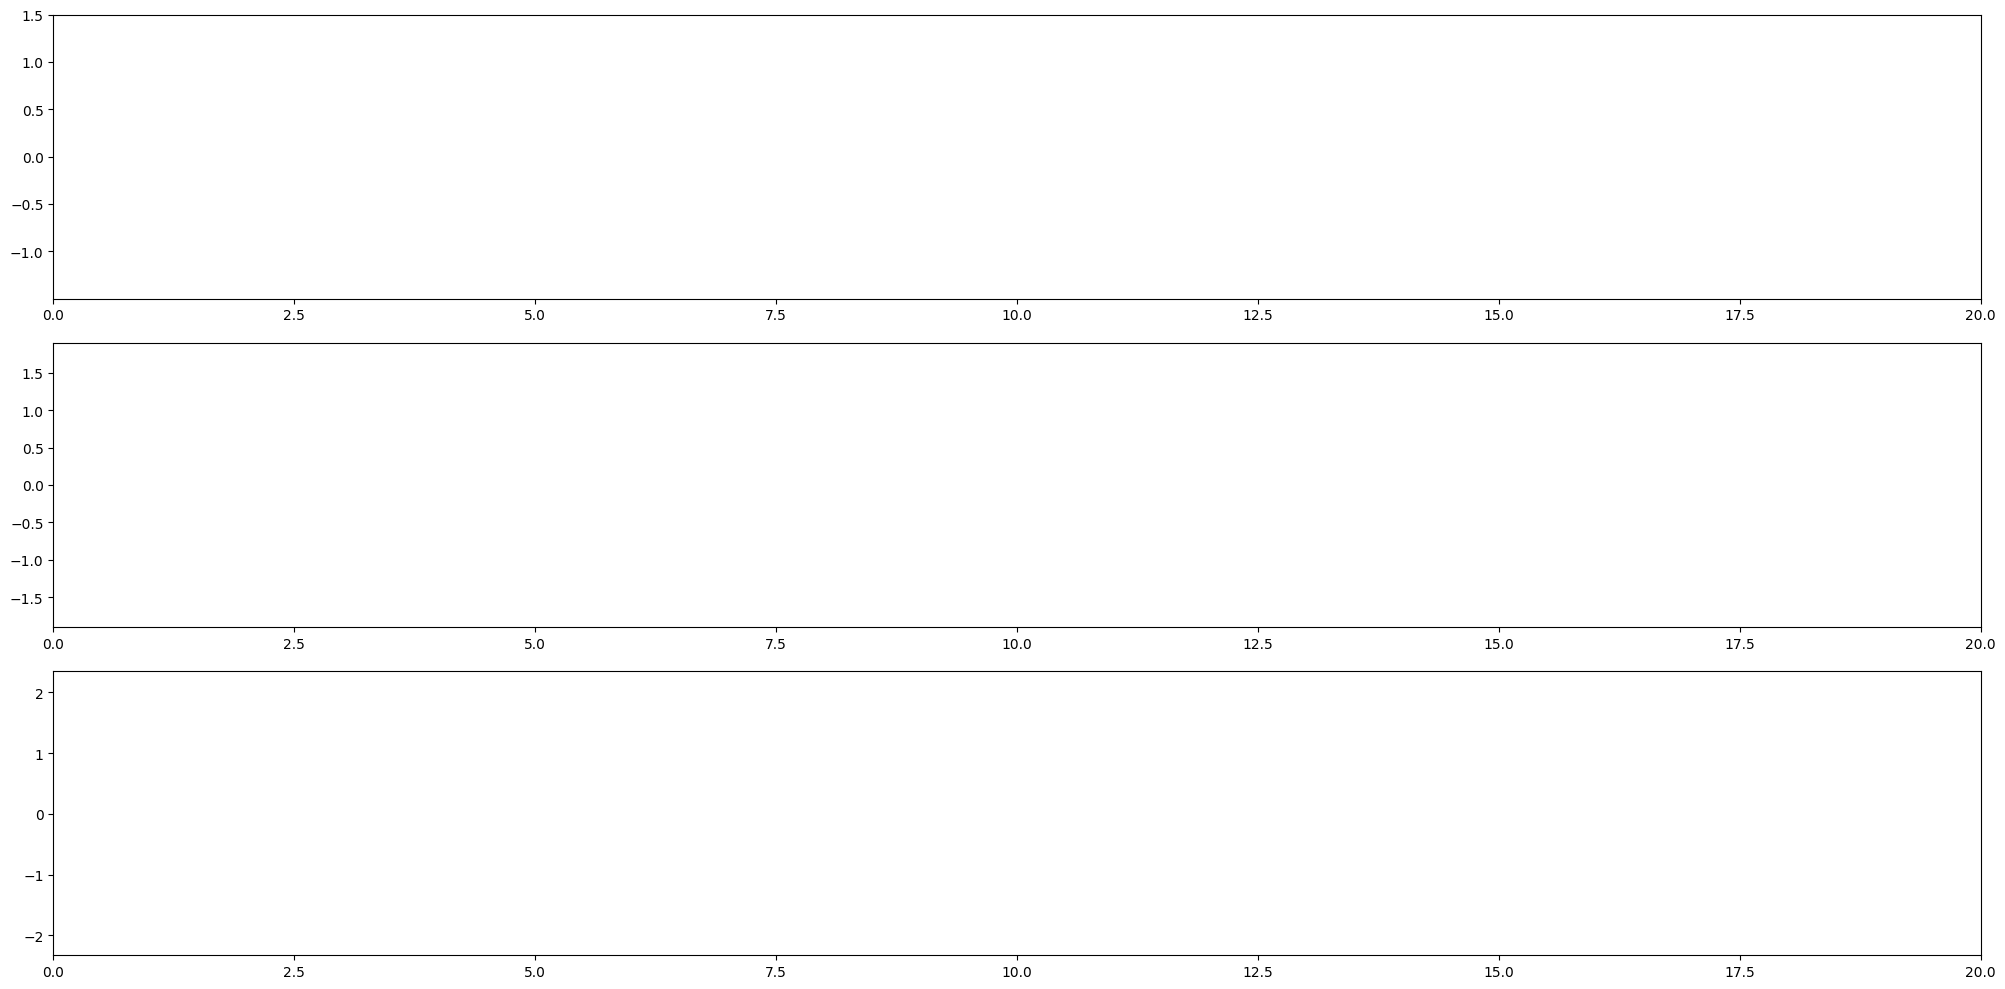

In [4]:
amp1 = 0.5
amp2 = 0.9
k1 = 2*np.pi
k2 = 2*np.pi
x = 1
f1 = 0.1
f2 = 1
timeArray = np.linspace(0,20,1000)
msig = wave(amp1,k1,x,timeArray,f1)
mcar = wave(0.9,k2,x,timeArray,f2)
mwam = wam(amp1,k1,amp2,k2,x,timeArray,f1,f2)

fig, ax = plt.subplots(3,1,figsize=(20,10))
plt.tight_layout()
waveMessage, = ax[0].plot([],[],'g')
waveCarrier, = ax[1].plot([],[],'b')
waveAM, = ax[2].plot([],[],'r')

ax[0].set_xlim(0, max(timeArray))
ax[1].set_xlim(0, max(timeArray))
ax[2].set_xlim(0, max(timeArray))

ax[2].set_ylim(min(mwam) - 1, max(mwam)+1)
ax[0].set_ylim(min(msig) - 1, max(msig)+1)
ax[1].set_ylim(min(mcar) - 1, max(mcar)+1)

def animate(i):
    waveMessage.set_data(timeArray[:i+1], msig[:i+1])
    waveCarrier.set_data(timeArray[:i+1], mcar[:i+1])
    waveAM.set_data(timeArray[:i+1], mwam[:i+1])
    return waveMessage, waveCarrier, waveAM

ani = anim.FuncAnimation(fig, animate, frames=len(timeArray), interval=100)

# Menyimpan Animasi
ffmep_writer = FFMpegWriter(fps=60)
ani.save('AMmodulation.mp4', writer=ffmep_writer)

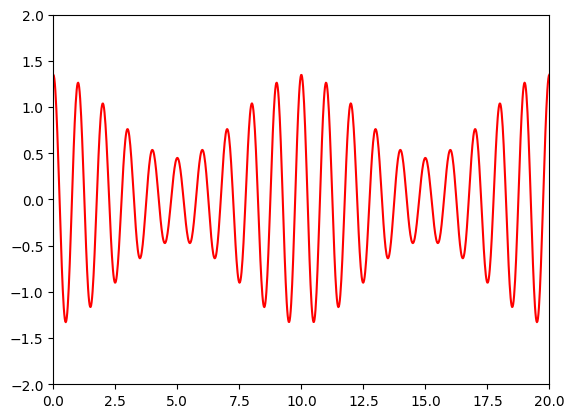

In [23]:
#plt.plot(timeArray,msig,'b')
#plt.plot(timeArray,mcar,'g')
plt.plot(timeArray,mwam,'r')
plt.xlim(0,20)
plt.ylim(-2,2)
plt.show()